In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from skimage import color
from PIL import ImageFile
import skimage
from PIL import Image
from skimage.transform import resize
import pandas as pd
from skimage.io import imread, imshow
from nltk import WordNetLemmatizer
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')

In [ ]:
torch.set_default_tensor_type(torch.DoubleTensor)

## **Task1**

In [ ]:
data=pd.read_csv('sentiment.csv',index_col=0)
data=data[data['filename']!='COCO_val2014_000000130712.jpg']
data=data[data['filename']!='COCO_val2014_000000359276.jpg']
data=data[data['filename']!='COCO_val2014_000000310622.jpg']
data=data[data['filename']!='COCO_val2014_000000421673.jpg']

In [ ]:
data=data.reset_index(drop=True)
data

,imgid,split,filename,successful,tokens,word_sentiment,sentiment,raw
0,31369,train,COCO_val2014_000000389081.jpg,1,"['a', 'plate', 'of', 'delicious', 'food', 'inc...","[0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0]",1,a plate of delicious food including French fries.
1,31369,train,COCO_val2014_000000389081.jpg,1,"['french', 'fries', 'are', 'not', 'a', 'health...","[0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0,...",1,French fries are not a healthy food but it is ...
2,31369,train,COCO_val2014_000000389081.jpg,1,"['the', 'plate', 'has', 'one', 'of', 'my', 'fa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0,...",1,"The plate has one of my favorite foods on it, ..."
3,31369,train,COCO_val2014_000000389081.jpg,1,"['it', 'was', 'disgusting', 'food', 'not', 'ju...","[0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,"It was disgusting food, not just bad food."
4,31369,train,COCO_val2014_000000389081.jpg,1,"['a', 'plate', 'of', 'disgusting', 'food', 'fo...","[0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0, 0.0]",0,A plate of disgusting food found at a diner.
...,...,...,...,...,...,...,...,...
39104,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,A dirty bathroom that has a dirty window made ...
39105,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 0.0, 0.0]",0,A dirty bathroom that has a window in it.
39106,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'towel', 'that', 'is', 'on', 'a', 'rack'...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,a towel that is on a rack in a dirty bathroom
39107,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,A dirty bathroom that has a dirty window made ...


In [ ]:
resnet=models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 512)
resnet = resnet.cuda()
img=list(data['filename'])

for i,filename in enumerate(img):
  image = Image.open(r'C:/Users/Ryzen/Downloads/sentiment/sentiment_images/'+f'{filename}')
  image = transforms.Resize((256, 256))(image)
  image=image.convert("RGB")
  image_tensor = transforms.ToTensor()(image)
  image_tensor = torch.unsqueeze(image_tensor, dim=0).to('cuda')
  image_tensor= resnet(image_tensor)
  torch.save(image_tensor,r"C:/Users/Ryzen/Downloads/sentiment/image_tensors/" + f'{i}.pt')

In [ ]:
def remove_pun(st):             #remove punctuation form the string
    pun=[]
    for i in st:
        if(not i in string.punctuation):     #if no punctuation append in list
            pun.append(i)
    return pun
def remove_stopwords(word_list):
        st = set(stopwords.words('english'))
        word=[]
        for i in word_list:
            if not i.lower() in st:
                word.append(i);
        return word

def text_process(val):
  word=remove_pun(val)
  word=''.join(word)
  word=remove_stopwords(word.split(' '))
  word=' '.join(word)
  word=word.lower()

  lemmatizer = WordNetLemmatizer()
  word=lemmatizer.lemmatize(word)
  return word

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer=tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
model=model.cuda()
text=list(data['raw'])
for i,val in enumerate(text):
    text[i]=text_process(val)
for i,t in enumerate(text):
    text_data = [t]

    tokens = tokenizer.batch_encode_plus(text_data, padding=True, truncation=True, return_tensors='pt')
    input_ids = tokens['input_ids'].to('cuda')
    attention_mask = tokens['attention_mask'].to('cuda')

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings = outputs.pooler_output

    torch.save(embeddings[0],r"C:/Users/Ryzen/Downloads/sentiment/text_tensors/" + f'{i}.pt')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import os
file_names = os.listdir(r"C:/Users/Ryzen/Downloads/sentiment/image_tensors/")
t_file=[]
for file_name in file_names:
    t_file.append(file_name)

t_file = sorted(t_file, key=lambda x: int(x.split('.')[0]))
t_file
data['t_file']=t_file

In [ ]:
file_names = os.listdir(r"C:/Users/Ryzen/Downloads/sentiment/text_tensors/")
tt_file=[]
for file_name in file_names:
    tt_file.append(file_name)

tt_file = sorted(tt_file, key=lambda x: int(x.split('.')[0]))
data['tt_file']=tt_file

In [ ]:
data.iloc[100]

imgid                                                         29806
split                                                           val
filename                              COCO_val2014_000000027517.jpg
successful                                                        1
tokens            ['a', 'nice', 'person', 'holds', 'a', 'flip', ...
word_sentiment       [0.0, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentiment                                                         1
raw               A nice person holds a flip phone displaying th...
t_file                                                       100.pt
tt_file                                                      100.pt
Name: 100, dtype: object

In [ ]:
dt=data[['tt_file','t_file','sentiment','split']]
dt2=data[['tt_file','t_file','sentiment','split']]
dt3=data[['tt_file','t_file','sentiment','split']]
dt=dt[dt['split'] == 'train']
dt2=dt2[dt2['split'] == 'test']
dt3=dt3[dt3['split'] == 'val']
dt=dt.drop("split", axis=1)
dt2=dt2.drop("split", axis=1)
dt3=dt3.drop("split", axis=1)
dt=dt.reset_index()
dt2=dt2.reset_index()
dt3=dt3.reset_index()

In [ ]:
dt

,index,tt_file,t_file,sentiment
0,0,0.pt,0.pt,1
1,1,1.pt,1.pt,1
2,2,2.pt,2.pt,1
3,3,3.pt,3.pt,0
4,4,4.pt,4.pt,0
...,...,...,...,...
19302,23192,23192.pt,23192.pt,0
19303,23193,23193.pt,23193.pt,0
19304,23194,23194.pt,23194.pt,0
19305,23195,23195.pt,23195.pt,0


In [ ]:
dt2

,index,tt_file,t_file,sentiment
0,23197,23197.pt,23197.pt,1
1,23198,23198.pt,23198.pt,1
2,23199,23199.pt,23199.pt,1
3,23200,23200.pt,23200.pt,0
4,23201,23201.pt,23201.pt,0
...,...,...,...,...
15907,39104,39104.pt,39104.pt,0
15908,39105,39105.pt,39105.pt,0
15909,39106,39106.pt,39106.pt,0
15910,39107,39107.pt,39107.pt,0


In [ ]:
dt3

,index,tt_file,t_file,sentiment
0,88,88.pt,88.pt,1
1,89,89.pt,89.pt,1
2,90,90.pt,90.pt,1
3,91,91.pt,91.pt,0
4,92,92.pt,92.pt,0
...,...,...,...,...
3885,23115,23115.pt,23115.pt,0
3886,23116,23116.pt,23116.pt,0
3887,23117,23117.pt,23117.pt,0
3888,23118,23118.pt,23118.pt,0


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        index,tt_file,t_file,label = self.df.iloc[idx]
        image_tensor=torch.load(r"C:/Users/Ryzen/Downloads/sentiment/image_tensors/" + f'{t_file}')
        text_tensor=torch.load(r"C:/Users/Ryzen/Downloads/sentiment/text_tensors/" + f'{tt_file}')
        return image_tensor,text_tensor,label

In [ ]:
d=CustomDataset(dt)

In [ ]:
d[0]

(tensor([[-0.4529,  0.1520, -0.8878,  0.1160, -1.3631,  0.4783, -0.8316, -0.1751,
          -0.3653,  0.2231,  0.6726, -0.6359,  0.0079,  0.7540,  0.7366,  1.1338,
           0.1078, -0.0795, -0.1309,  0.3315,  0.4276, -0.2834,  0.3716, -0.3933,
           0.0818,  0.8876,  0.2063, -0.4019,  0.5818,  0.2681,  1.2852,  0.7556,
           0.2873,  0.4067,  0.3509, -0.5779,  0.0811, -0.2996, -1.0278, -0.0741,
           0.4733,  0.2809,  0.0534,  0.5421, -0.0428,  0.6627,  0.3924,  0.6033,
           0.2060, -0.3437,  0.4430, -0.6639, -0.7588,  0.5194, -0.0667, -0.2120,
          -0.2265,  0.1845,  0.5653, -0.0172,  0.4538,  0.1785, -0.7463, -0.1040,
          -0.6638,  0.6325,  0.1792, -1.4458, -0.9793,  0.3762,  0.8622,  0.9115,
          -1.1045,  0.5213, -0.1659, -0.2519, -0.1278, -0.1755, -0.2230, -0.5886,
           0.2660,  0.0089,  0.6253, -0.3765,  0.7954,  0.1166, -0.1686,  0.9700,
           0.0553,  0.2705, -0.4484, -0.5546, -0.1443, -0.2582, -0.1253, -0.2648,
           0.227

In [ ]:
train_set=CustomDataset(dt)
val_set=CustomDataset(dt3)
test_set=CustomDataset(dt2)

In [ ]:
BATCH_SIZE = 256
train_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
val_dataloader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
test_dataloader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)

In [ ]:
len(test_dataloader)

62

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # Load the ResNet32 model pretrained on ImageNet

        self.im_layer1 = nn.Linear(512, 256)
        self.im_layer2 = nn.Linear(256,128)
        self.im_layer3 = nn.Linear(128,64)
        self.im_layer4 = nn.Linear(64,16)

        self.text_fc1 = nn.Linear(768, 256)
        self.text_fc2 = nn.Linear(256, 100)
        self.text_fc3 = nn.Linear(100, 24)
        self.text_fc4 = nn.Linear(24, 16)

        self.linear1 = nn.Linear(32,32)
        self.linear2 = nn.Linear(32,24)
        self.linear3 = nn.Linear(24,16)
        self.linear4 = nn.Linear(16,1)

        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()
    def forward(self, image_features,text_features):
        # Forward pass for image features using ResNet32

        image_output = self.im_layer1(image_features)
        image_output = F.relu(image_output)

        image_output = self.im_layer2(image_output)
        image_output = F.relu(image_output)

        image_output = self.im_layer3(image_output)
        text_output = F.relu(image_output)

        image_output = self.im_layer4(image_output)
        # Forward pass for text features using linear layers
        text_output = self.text_fc1(text_features)
        text_output = F.relu(text_output)

        text_output = self.text_fc2(text_output)
        text_output = F.relu(text_output)

        text_output = self.text_fc3(text_output)
        text_output = F.relu(text_output)

        text_output = self.text_fc4(text_output)
        # Combine the image and text outputs
        combined_output = torch.cat((image_output,text_output),dim=1)

        # Apply sigmoid activation

        output = self.linear1(combined_output)
        output = F.relu(output)

        output = self.linear2(output)
        text_output = F.relu(output)

        output = self.linear3(output)
        text_output = F.relu(output)

        output = self.linear4(output)
        output = self.sigmoid(output)

        return output

In [ ]:
model = MyModel()
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter im_layer1.weight, shape torch.Size([256, 512])
Parameter im_layer1.bias, shape torch.Size([256])
Parameter im_layer2.weight, shape torch.Size([128, 256])
Parameter im_layer2.bias, shape torch.Size([128])
Parameter im_layer3.weight, shape torch.Size([64, 128])
Parameter im_layer3.bias, shape torch.Size([64])
Parameter im_layer4.weight, shape torch.Size([16, 64])
Parameter im_layer4.bias, shape torch.Size([16])
Parameter text_fc1.weight, shape torch.Size([256, 768])
Parameter text_fc1.bias, shape torch.Size([256])
Parameter text_fc2.weight, shape torch.Size([100, 256])
Parameter text_fc2.bias, shape torch.Size([100])
Parameter text_fc3.weight, shape torch.Size([24, 100])
Parameter text_fc3.bias, shape torch.Size([24])
Parameter text_fc4.weight, shape torch.Size([16, 24])
Parameter text_fc4.bias, shape torch.Size([16])
Parameter linear1.weight, shape torch.Size([32, 32])
Parameter linear1.bias, shape torch.Size([32])
Parameter linear2.weight, shape torch.Size([24, 32])
Parameter

In [ ]:
def validation(model, validloader):
    valid_loss = 0
    accuracy = 0
    criterion = nn.BCELoss()

    for i, (images,text, labels) in enumerate(validloader):
        images=images.to('cuda')
        text=text.to('cuda')
        labels=labels.to('cuda')

        output = model(images.squeeze(1),text)
        loss=criterion(outputs.flatten(), labels.double()).item()
        valid_loss+=loss.item*256

        accuracy += int(sum((outputs.flatten()>0.5)==labels.flatten()))


    return valid_loss, accuracy

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCELoss()
learning_rate=0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model = MyModel().to('cuda')
num_epochs=20

# Training loop
for epoch in range(num_epochs):
    model.train()
    torch.enable_grad()
    for batch_idx, (images,text, targets) in enumerate(train_dataloader):
        images = images.to(device)
        text = text.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(images.squeeze(1),text)
        loss = criterion(outputs.flatten(), targets.double())
        trainLoss+=loss.item*256
        trainAccuracy += int(sum((outputs.flatten()>0.5)==targets.flatten()))

        model.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    valLoss = 0
    valAccuracy = 0

    valLoss,valAccuracy=validation(model,val_dataloader)

    print(f'Epoch # {epoch + 1}:-')
    print(f'Train Acc:- {trainAccuracy  / len(train_dataloader): .5f}   Train Loss:- {trainLoss / len(train_dataloader): .5f}')
    print(f'Val Loss:- {valLoss / len(val_dataloader): .5f}   Val Acc:- {valAccuracy  / len(val_dataloader): .5f}')

Epoch # 1:-
Train Acc:-  0.63630   Train Loss:-  0.62064
Val Loss:-  0.48862   Val Acc:-  0.78509
Epoch # 2:-
Train Acc:-  0.81069   Train Loss:-  0.41858
Val Loss:-  0.37059   Val Acc:-  0.84062
Epoch # 3:-
Train Acc:-  0.84021   Train Loss:-  0.36940
Val Loss:-  0.34588   Val Acc:-  0.86041
Epoch # 4:-
Train Acc:-  0.86782   Train Loss:-  0.32111
Val Loss:-  0.35714   Val Acc:-  0.83985
Epoch # 5:-
Train Acc:-  0.86989   Train Loss:-  0.31445
Val Loss:-  0.39105   Val Acc:-  0.81414
Epoch # 6:-
Train Acc:-  0.87015   Train Loss:-  0.31040
Val Loss:-  0.29104   Val Acc:-  0.88046
Epoch # 7:-
Train Acc:-  0.87678   Train Loss:-  0.29472
Val Loss:-  0.28276   Val Acc:-  0.88638
Epoch # 8:-
Train Acc:-  0.88414   Train Loss:-  0.28479
Val Loss:-  0.27777   Val Acc:-  0.89486
Epoch # 9:-
Train Acc:-  0.88688   Train Loss:-  0.28065
Val Loss:-  0.27720   Val Acc:-  0.89512
Epoch # 10:-
Train Acc:-  0.89429   Train Loss:-  0.26596
Val Loss:-  0.31568   Val Acc:-  0.86761
Epoch # 11:-
Train 

In [ ]:
outputs=[]
labelss=[]
learningRate = 0.001
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr= learnRate)
device = torch.device("cuda" if useCuda else "cpu")
with torch.no_grad():
    for image, text, labels in test_dataloader:
        image = image.to(device)
        text = text.to(device)
        labels = labels.to(device)

        outputs = model(image.squeeze(1),text)
        loss = criterion(output.flatten(), labels.double())
        test_loss += loss.item()*256
        accu = ((output.flatten() >= 0.5) == labels).sum().item()
        Test_accu += accu
        outputs.append((output.flatten() >= 0.5).tolist())
        labelss.append(valLabel.tolist())

        print(f'Test Loss:- {test_loss/len(test_dataloader): .5f}   Test Acc:- {Test_accu  / len(test_dataloader): .5f}')

Test Loss:-  0.30160   Test Acc:-  0.87802


In [ ]:
outputs
outputss=[]
for i in outputs:
    for j in i:
        if j==True:
            outputss.append(1)
        else:
            outputss.append(0)

In [ ]:
labelss
labelsss=[]
for i in labelss:
    for j in i:
        labelsss.append(j)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7191
           1       0.91      0.86      0.89      8721

    accuracy                           0.88     15912
   macro avg       0.88      0.88      0.88     15912
weighted avg       0.88      0.88      0.88     15912



<Axes: >

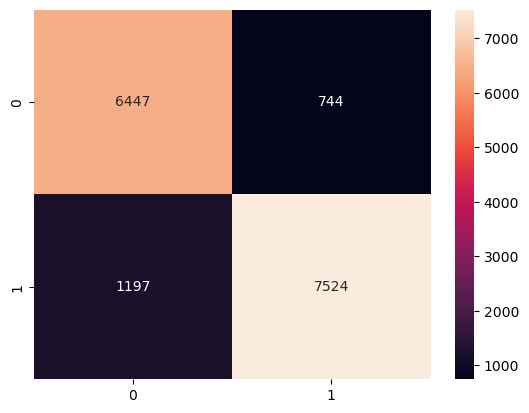

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
print(classification_report(labelsss,outputss))
cf=confusion_matrix(labelsss, outputss)
sn.heatmap(cf,annot=True,fmt='.0f')

In [ ]:
pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4137 sha256=38ea7c3902a2d40f1602ed427a7075a987c6e3f9aeec898d0cf9fa3ca09458bd
  Stored in directory: c:\users\ryzen\appdata\local\pip\cache\wheels\6b\07\a3\bdeec9e7658d32e105b9fa530b50d2606ca8ff89782e426e65
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


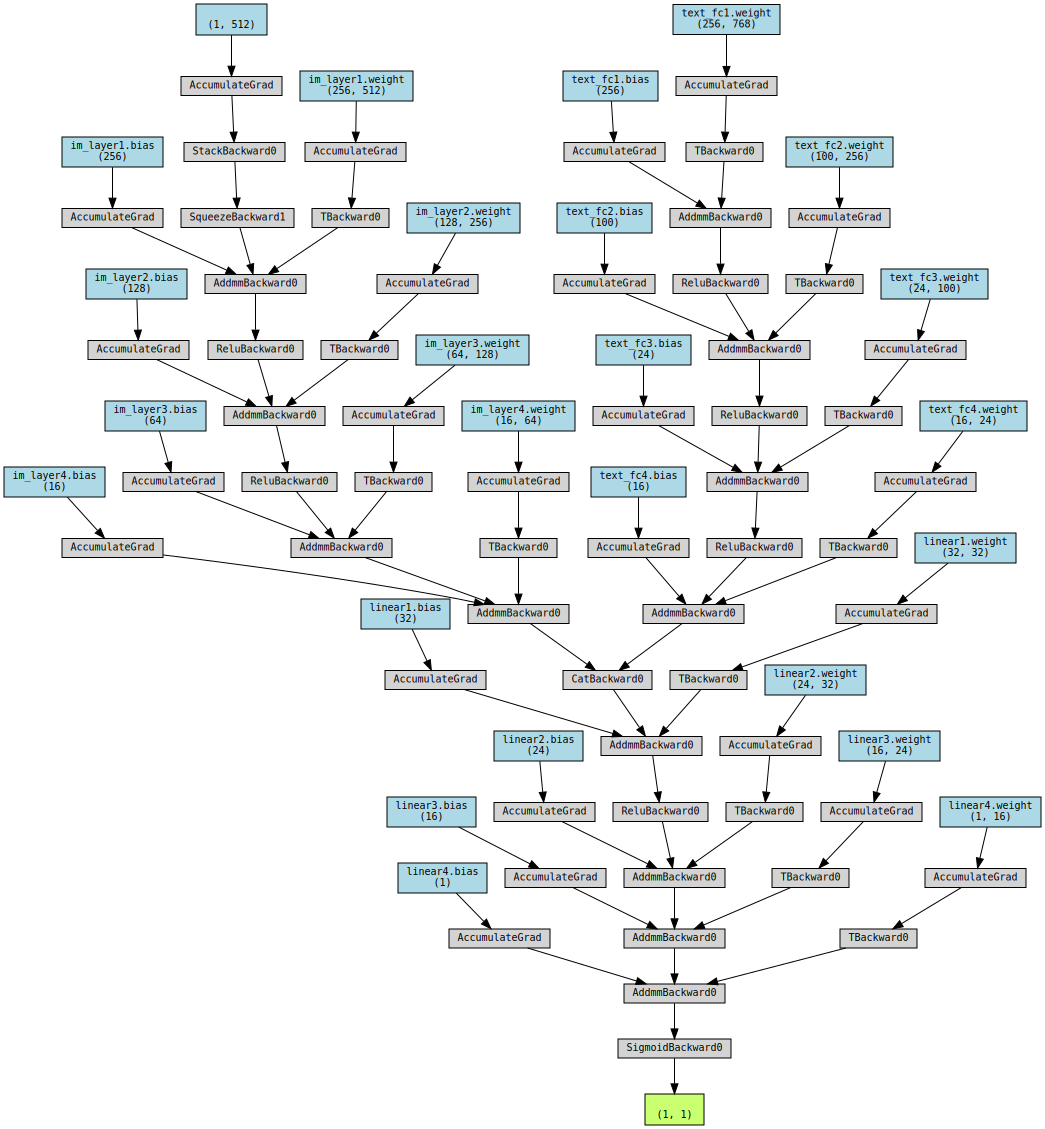

In [ ]:
from torchviz import make_dot
model = MyModel()
model = model.to('cuda:0')
t_dataloader = DataLoader(train_set, batch_size=1, shuffle=True,drop_last=True)
train_img,train_text, train_labels = next(iter(t_dataloader))
train_img = train_img.to('cuda:0')
train_text = train_text.to('cuda:0')
analysis = model(train_img.squeeze(1),train_text)
make_dot(analysis,params=dict(list(model.named_parameters())))


### **Task 2:**

In [ ]:
data

,imgid,split,filename,successful,tokens,word_sentiment,sentiment,raw,t_file,tt_file
0,31369,train,COCO_val2014_000000389081.jpg,1,"['a', 'plate', 'of', 'delicious', 'food', 'inc...","[0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0]",1,a plate of delicious food including French fries.,0.pt,0.pt
1,31369,train,COCO_val2014_000000389081.jpg,1,"['french', 'fries', 'are', 'not', 'a', 'health...","[0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0,...",1,French fries are not a healthy food but it is ...,1.pt,1.pt
2,31369,train,COCO_val2014_000000389081.jpg,1,"['the', 'plate', 'has', 'one', 'of', 'my', 'fa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0,...",1,"The plate has one of my favorite foods on it, ...",2.pt,2.pt
3,31369,train,COCO_val2014_000000389081.jpg,1,"['it', 'was', 'disgusting', 'food', 'not', 'ju...","[0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,"It was disgusting food, not just bad food.",3.pt,3.pt
4,31369,train,COCO_val2014_000000389081.jpg,1,"['a', 'plate', 'of', 'disgusting', 'food', 'fo...","[0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0, 0.0]",0,A plate of disgusting food found at a diner.,4.pt,4.pt
...,...,...,...,...,...,...,...,...,...,...
39104,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,A dirty bathroom that has a dirty window made ...,39104.pt,39104.pt
39105,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 0.0, 0.0]",0,A dirty bathroom that has a window in it.,39105.pt,39105.pt
39106,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'towel', 'that', 'is', 'on', 'a', 'rack'...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,a towel that is on a rack in a dirty bathroom,39106.pt,39106.pt
39107,24628,test,COCO_val2014_000000190705.jpg,1,"['a', 'dirty', 'bathroom', 'that', 'has', 'a',...","[0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1]",0,A dirty bathroom that has a dirty window made ...,39107.pt,39107.pt


In [ ]:
data2 = data.drop_duplicates(subset='raw')

In [ ]:
data2=data2.reset_index(drop=True)

In [ ]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
text=list(data2['tokens'])
split=list(data2['split'])
splits=[]
ngrams=[]
for idx,j in enumerate(text):
    tokens = eval(j)
    for i in range(len(tokens)):
        if  i==len(tokens)-1:
           ngram = [tokens[i-1], tokens[i], ' ']
        else:
          if i-1>=0:
            ngram = [tokens[i-1], tokens[i], tokens[i + 1]]
          if i-1<0:
            ngram = [' ', tokens[i], tokens[i + 1]]
        splits.append(split[idx])
        ngrams.append(ngram)

In [ ]:
ngrams

[[' ', 'a', 'plate'],
 ['a', 'plate', 'of'],
 ['plate', 'of', 'delicious'],
 ['of', 'delicious', 'food'],
 ['delicious', 'food', 'including'],
 ['food', 'including', 'french'],
 ['including', 'french', 'fries'],
 ['french', 'fries', ' '],
 [' ', 'french', 'fries'],
 ['french', 'fries', 'are'],
 ['fries', 'are', 'not'],
 ['are', 'not', 'a'],
 ['not', 'a', 'healthy'],
 ['a', 'healthy', 'food'],
 ['healthy', 'food', 'but'],
 ['food', 'but', 'it'],
 ['but', 'it', 'is'],
 ['it', 'is', 'an'],
 ['is', 'an', 'excellent'],
 ['an', 'excellent', 'food'],
 ['excellent', 'food', 'for'],
 ['food', 'for', 'teenagers'],
 ['for', 'teenagers', ' '],
 [' ', 'the', 'plate'],
 ['the', 'plate', 'has'],
 ['plate', 'has', 'one'],
 ['has', 'one', 'of'],
 ['one', 'of', 'my'],
 ['of', 'my', 'favorite'],
 ['my', 'favorite', 'foods'],
 ['favorite', 'foods', 'on'],
 ['foods', 'on', 'it'],
 ['on', 'it', 'french'],
 ['it', 'french', 'fries'],
 ['french', 'fries', ' '],
 [' ', 'it', 'was'],
 ['it', 'was', 'disgusting'

In [ ]:
data3=pd.DataFrame()
data3['ngramss']=ngrams
data3['split']=splits
data3

,ngramss,split
0,"[ , a, plate]",train
1,"[a, plate, of]",train
2,"[plate, of, delicious]",train
3,"[of, delicious, food]",train
4,"[delicious, food, including]",train
...,...,...
105342,"[that, has, a]",test
105343,"[has, a, window]",test
105344,"[a, window, in]",test
105345,"[window, in, it]",test


In [ ]:
label=list(data2['word_sentiment'])
labels=[]
for i,lbl in enumerate(label):
    lbl=eval(lbl)
    for j in lbl:
        labels.append(j)

In [ ]:
data3['label']=labels
data3.head(10)

,ngramss,split,label,t_file
0,"[ , a, plate]",train,0.0,0.pt
1,"[a, plate, of]",train,0.0,1.pt
2,"[plate, of, delicious]",train,0.0,2.pt
3,"[of, delicious, food]",train,1.0,3.pt
4,"[delicious, food, including]",train,1.0,4.pt
5,"[food, including, french]",train,0.0,5.pt
6,"[including, french, fries]",train,0.0,6.pt
7,"[french, fries, ]",train,0.0,7.pt
8,"[ , french, fries]",train,0.0,8.pt
9,"[french, fries, are]",train,0.0,9.pt


In [ ]:
data2['label']=label

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer=tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
model=model.cuda()
ngrams=list(data3['ngramss'])
for i,t in enumerate(ngrams):
        t=' '.join(t)
        text_data = [t]

        tokens = tokenizer.batch_encode_plus(text_data, padding=True, truncation=True, return_tensors='pt')
        input_ids = tokens['input_ids'].to('cuda')
        attention_mask = tokens['attention_mask'].to('cuda')

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            embeddings = outputs.pooler_output
        torch.save(embeddings[0],r"C:/Users/Ryzen/Downloads/sentiment/text_tensors2/" + f'{i}.pt')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
file_names = os.listdir(r"C:/Users/Ryzen/Downloads/sentiment/text_tensors2/")
tt2_file=[]
for file_name in file_names:
    tt2_file.append(file_name)

tt2_file = sorted(tt2_file, key=lambda x: int(x.split('.')[0]))
data3['t_file']=tt2_file

In [ ]:
data3

,ngramss,split,label,t_file
0,"[ , a, plate]",train,0.0,0.pt
1,"[a, plate, of]",train,0.0,1.pt
2,"[plate, of, delicious]",train,0.0,2.pt
3,"[of, delicious, food]",train,1.0,3.pt
4,"[delicious, food, including]",train,1.0,4.pt
...,...,...,...,...
105342,"[that, has, a]",test,0.0,105342.pt
105343,"[has, a, window]",test,0.0,105343.pt
105344,"[a, window, in]",test,1.0,105344.pt
105345,"[window, in, it]",test,0.0,105345.pt


In [ ]:
text1=data3[['split','label','t_file']]
text2=data3[['split','label','t_file']]
text3=data3[['split','label','t_file']]
text1=text1[text1['split'] == 'train']
text2=text2[text2['split'] == 'test']
text3=text3[text3['split'] == 'val']
text1=text1.drop("split", axis=1)
text2=text2.drop("split", axis=1)
text3=text3.drop("split", axis=1)

In [ ]:
text1

,label,t_file
0,0.0,0.pt
1,0.0,1.pt
2,0.0,2.pt
3,1.0,3.pt
4,1.0,4.pt
...,...,...
62581,1.0,62581.pt
62582,0.0,62582.pt
62583,0.0,62583.pt
62584,0.0,62584.pt


In [ ]:
text2

,label,t_file
62586,0.0,62586.pt
62587,0.0,62587.pt
62588,0.0,62588.pt
62589,0.0,62589.pt
62590,1.0,62590.pt
...,...,...
105342,0.0,105342.pt
105343,0.0,105343.pt
105344,1.0,105344.pt
105345,0.0,105345.pt


In [ ]:
text3

,label,t_file
175,0.0,175.pt
176,1.0,176.pt
177,1.0,177.pt
178,0.0,178.pt
179,0.0,179.pt
...,...,...
62208,0.0,62208.pt
62209,0.0,62209.pt
62210,0.0,62210.pt
62211,0.0,62211.pt


In [ ]:
class CustomDataset2(Dataset):
    def __init__(self, df):
        self.df = df
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        labels,ngrams = self.df.iloc[idx]
        ngrams=torch.load(r"C:/Users/Ryzen/Downloads/sentiment/text_tensors2/" + f'{ngrams}')
        return ngrams,torch.tensor(labels).double()

In [ ]:
d=CustomDataset2(text1)

In [ ]:
d[0]

(tensor([-7.1562e-01, -2.6280e-02,  7.2175e-01,  4.7682e-01, -2.1713e-01,
         -5.9692e-02,  7.3249e-01,  6.6728e-02,  5.7147e-01, -9.9850e-01,
          1.9177e-01, -1.1936e-01,  9.6285e-01, -5.1590e-01,  8.7987e-01,
         -2.7091e-01,  3.9820e-02, -5.0586e-01,  2.9095e-01, -5.5014e-01,
          3.4459e-01,  5.5568e-01,  5.3660e-01,  1.2738e-01,  1.9909e-01,
         -3.0669e-01, -3.2809e-01,  8.7832e-01,  9.1024e-01,  5.9510e-01,
         -4.4251e-01,  9.7805e-02, -9.7293e-01, -7.8033e-02,  6.2691e-01,
         -9.6537e-01,  6.5119e-02, -6.2023e-01,  1.0606e-01,  9.8676e-02,
         -8.3697e-01,  1.2131e-01,  9.7677e-01, -4.0267e-01, -3.1798e-02,
         -2.3641e-01, -9.9081e-01,  1.4729e-01, -7.8566e-01, -6.3626e-01,
         -3.6809e-01, -7.4298e-01,  1.9814e-02,  2.5569e-01,  2.2240e-01,
          4.1232e-01, -2.6272e-01,  1.2911e-01, -4.3113e-02, -3.4178e-01,
         -5.5195e-01,  1.7636e-01,  2.0809e-01, -7.8182e-01, -4.8573e-01,
         -7.8442e-01, -4.9805e-02, -1.

In [ ]:
train_set=CustomDataset2(text1)
val_set=CustomDataset2(text3)
test_set=CustomDataset2(text2)

In [ ]:
BATCH_SIZE = 256
train_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
val_dataloader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
test_dataloader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)

In [ ]:
class Text_Model(nn.Module):
    def __init__(self):
        super(Text_Model, self).__init__()

        self.linear1 = nn.Linear(768,1100)
        self.linear2 = nn.Linear(1100,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,64)
        self.linear6 = nn.Linear(64,32)
        self.linear7 = nn.Linear(32,1)


        self.sigmoid = nn.Sigmoid()
    def forward(self,text_features):

        output = self.linear1(text_features)
        output = F.relu(output)

        output = self.linear2(output)
        text_output = F.relu(output)

        output = self.linear3(output)
        text_output = F.relu(output)

        output = self.linear4(output)
        output = F.relu(output)

        output = self.linear5(output)
        output = F.relu(output)

        output = self.linear6(output)
        output = F.relu(output)

        output = self.linear7(output)
        output = self.sigmoid(output)

        return output

In [ ]:
model = MyModel()
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter im_layer1.weight, shape torch.Size([256, 512])
Parameter im_layer1.bias, shape torch.Size([256])
Parameter im_layer2.weight, shape torch.Size([128, 256])
Parameter im_layer2.bias, shape torch.Size([128])
Parameter im_layer3.weight, shape torch.Size([64, 128])
Parameter im_layer3.bias, shape torch.Size([64])
Parameter im_layer4.weight, shape torch.Size([16, 64])
Parameter im_layer4.bias, shape torch.Size([16])
Parameter text_fc1.weight, shape torch.Size([256, 768])
Parameter text_fc1.bias, shape torch.Size([256])
Parameter text_fc2.weight, shape torch.Size([100, 256])
Parameter text_fc2.bias, shape torch.Size([100])
Parameter text_fc3.weight, shape torch.Size([24, 100])
Parameter text_fc3.bias, shape torch.Size([24])
Parameter text_fc4.weight, shape torch.Size([16, 24])
Parameter text_fc4.bias, shape torch.Size([16])
Parameter linear1.weight, shape torch.Size([32, 32])
Parameter linear1.bias, shape torch.Size([32])
Parameter linear2.weight, shape torch.Size([24, 32])
Parameter

In [ ]:
def validation2(model, validloader):
    valid_loss = 0
    accuracy = 0
    criterion = nn.BCELoss()

    for i, (text, labels) in enumerate(validloader):
        text=text.to('cuda')
        labels=labels.to('cuda')

        output = model(text)
        loss=criterion(outputs.flatten(), labels.double()).item()
        valid_loss+=loss.item*256

        accuracy += int(sum((outputs.flatten()>0.5)==labels.flatten()))

    return valid_loss, accuracy

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCELoss()
learning_rate=0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model = MyModel().to('cuda')
num_epochs=10

# Training loop
for epoch in range(num_epochs):
    model.train()
    torch.enable_grad()
    for idx, (text, targets) in enumerate(train_dataloader):
        text = text.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(text)
        loss = criterion(outputs.flatten(), targets)
        train_Loss+=loss.item*256
        train_Accuracy += int(sum((outputs.flatten()>0.5)==targets.flatten()))

        model.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    valLoss = 0
    valAccuracy = 0

    valLoss,valAccuracy=validation2(model,val_dataloader)

    print(f'Epoch # {epoch + 1}:-')
    print(f'Train Acc:- {train_Accuracy  / len(train_dataloader): .5f}   Train Loss:- {train_Loss / len(train_dataloader): .5f}')
    print(f'Val Loss:- {valLoss / len(val_dataloader): .5f}   Val Acc:- {valAccuracy  / len(val_dataloader): .5f}')

Epoch # 1:-
Train Acc:-  0.85099   Train Loss:-  0.34881
Val Loss:-  0.24107   Val Acc:-  0.90656
Epoch # 2:-
Train Acc:-  0.91125   Train Loss:-  0.23278
Val Loss:-  0.22296   Val Acc:-  0.90796
Epoch # 3:-
Train Acc:-  0.91281   Train Loss:-  0.22588
Val Loss:-  0.22012   Val Acc:-  0.92186
Epoch # 4:-
Train Acc:-  0.92335   Train Loss:-  0.20585
Val Loss:-  0.19761   Val Acc:-  0.92848
Epoch # 5:-
Train Acc:-  0.92902   Train Loss:-  0.19199
Val Loss:-  0.18393   Val Acc:-  0.93239
Epoch # 6:-
Train Acc:-  0.92887   Train Loss:-  0.18900
Val Loss:-  0.21298   Val Acc:-  0.91729
Epoch # 7:-
Train Acc:-  0.93350   Train Loss:-  0.18081
Val Loss:-  0.17909   Val Acc:-  0.93333
Epoch # 8:-
Train Acc:-  0.93436   Train Loss:-  0.18002
Val Loss:-  0.20478   Val Acc:-  0.92298
Epoch # 9:-
Train Acc:-  0.93421   Train Loss:-  0.18085
Val Loss:-  0.17759   Val Acc:-  0.93640
Epoch # 10:-
Train Acc:-  0.93650   Train Loss:-  0.17428
Val Loss:-  0.16760   Val Acc:-  0.93920
Epoch # 11:-
Train 

In [ ]:
outputs=[]
labelss=[]
learningRate = 0.001
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr= learnRate)
device = torch.device("cuda" if useCuda else "cpu")
with torch.no_grad():
    for  text, labels in test_dataloader:

        text = text.to(device)
        labels = labels.to(device)

        outputs = model(text)
        loss = criterion(output.flatten(), labels)
        test_Loss += loss.item()*256
        accu = ((output.flatten() >= 0.5) == labels).sum().item()
        Test_accuracy += accu
        outputs.append((output.flatten() >= 0.5).tolist())
        labelss.append(valLabel.tolist())

        print(f'Test Loss:- {test_Loss/len(test_dataloader): .5f}   Test Acc:- {Test_accuracy/len(test_dataloader): .5f}')

Test Loss:-  0.14997   Test Acc:-  0.94743


In [ ]:
labelsss=[]
for i in labelss:
    for j in i:
        labelsss.append(j)

In [ ]:
outputs
outputss=[]
for i in outputs:
    for j in i:
        if j==True:
            outputss.append(1)
        else:
            outputss.append(0)

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     34248
         1.0       0.90      0.83      0.86      8513

    accuracy                           0.95     42761
   macro avg       0.93      0.90      0.92     42761
weighted avg       0.95      0.95      0.95     42761



<Axes: >

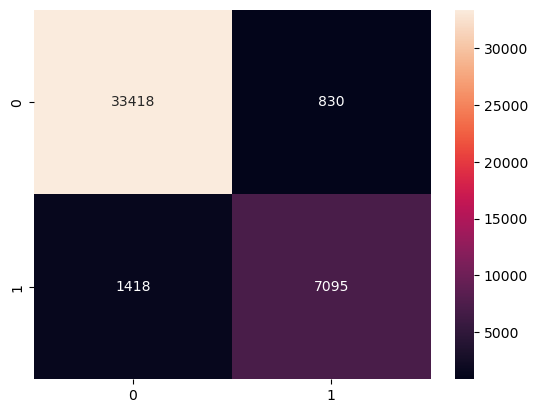

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
print(classification_report(labelsss,outputss))
cf=confusion_matrix(labelsss, outputss)
sn.heatmap(cf,annot=True,fmt='.0f')

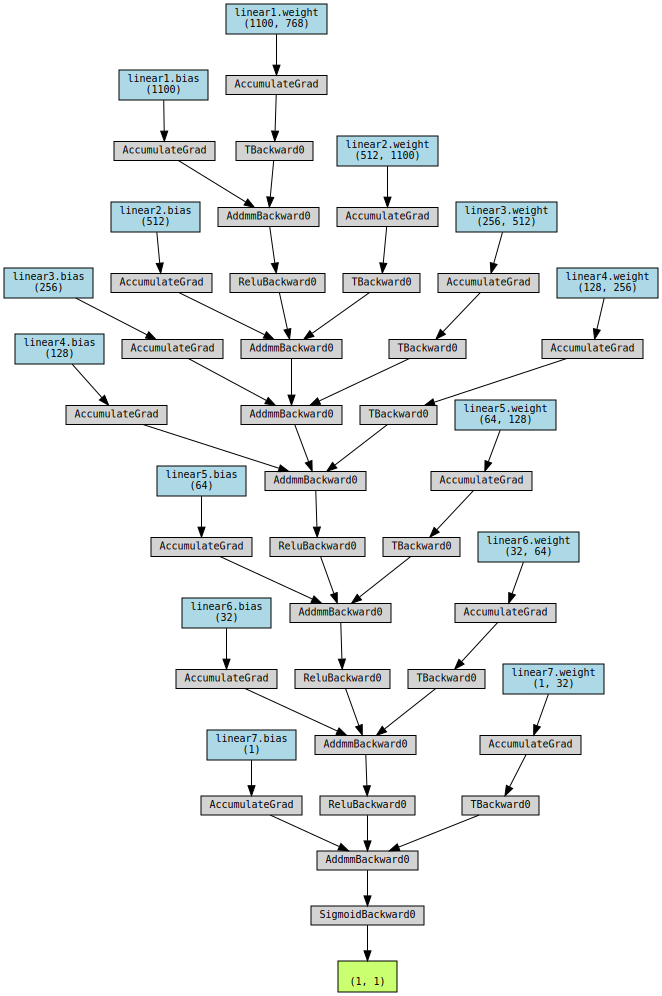

In [ ]:
from torchviz import make_dot
model = Text_Model()
model = model.to('cuda:0')
t_dataloader = DataLoader(train_set, batch_size=1, shuffle=True,drop_last=True)
train_text, train_labels = next(iter(t_dataloader))
train_text = train_text.to('cuda:0')
analysis = model(train_text)
make_dot(analysis,params=dict(list(model.named_parameters())))